In [1]:
# Import libraries
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [2]:
# Import data from excel files
df1 = pd.read_excel('Formative Assessment I_class_LKG.xlsx');
df2 = pd.read_excel('Formative Assessment-2_class_LKG.xlsx');
df3 = pd.read_excel('Half Yearly Exam_class_LKG.xlsx');

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True);

# print the head
df.head()

,Academic session,Exam Name,Exam Mode,Subject Name,Subject Status,Full Mark,Pass Mark,Negative Percentage,Student Name,Class,Section,Roll No,Marks Secured,Result
0,2022-2023,Formative Assessment I,Offline,Maths,Evaluating,25,7,0 %,Abhik Upadhya,Nursery,A,18,8.0,Pass
1,2022-2023,Formative Assessment I,Offline,Oral Maths,Evaluating,10,3,0 %,Abhik Upadhya,Nursery,A,18,8.0,Pass
2,2022-2023,Formative Assessment I,Offline,Rhymes,Evaluating,25,7,0 %,Abhik Upadhya,Nursery,A,18,24.0,Pass
3,2022-2023,Formative Assessment I,Offline,English,Evaluating,25,7,0 %,Abhik Upadhya,Nursery,A,18,10.5,Pass
4,2022-2023,Formative Assessment I,Offline,Oral English,Evaluating,10,3,0 %,Abhik Upadhya,Nursery,A,18,8.0,Pass


In [3]:
# Get all the Subject names
subjects = df['Subject Name'].unique();

# Get all the students
students = df['Student Name'].unique();

# Get all the Exam names
exams = df['Exam Name'].unique();

In [4]:
# Create a new dataframe for students data
df_new = pd.DataFrame(students, columns=['Student Name']);

# Loop through all the students
for student in students:
    # Find the first row of the student in the dataframe
    row = df.loc[df['Student Name'] == student].iloc[0];
    # Add the Class, Section, Roll No to the new dataframe
    df_new.loc[df_new['Student Name'] == student, 'Class'] = row['Class'];
    df_new.loc[df_new['Student Name'] == student, 'Section'] = row['Section'];
    df_new.loc[df_new['Student Name'] == student, 'Roll No'] = row['Roll No'];

df_new.head()

,Student Name,Class,Section,Roll No
0,Abhik Upadhya,Nursery,A,18.0
1,Eric Sharma,LKG,A,1.0
2,Manab Mukherjee,LKG,A,2.0
3,Prince Sonar,LKG,A,3.0
4,Saurav Kumar,LKG,A,4.0


In [5]:
# Add columns for each exam and subject
for exam in exams:
    for subject in subjects:
        df_new[exam + '_' + subject] = 0;
        df_new[exam + '_' + subject + '_total'] = 0;
        df_new[exam + '_' + subject + '_pass'] = 0;


df_new.head()      

,Student Name,Class,Section,Roll No,Formative Assessment I_Maths,Formative Assessment I_Maths_total,Formative Assessment I_Maths_pass,Formative Assessment I_Oral Maths,Formative Assessment I_Oral Maths_total,Formative Assessment I_Oral Maths_pass,...,Half Yearly Exam_Rhymes_pass,Half Yearly Exam_English,Half Yearly Exam_English_total,Half Yearly Exam_English_pass,Half Yearly Exam_Oral English,Half Yearly Exam_Oral English_total,Half Yearly Exam_Oral English_pass,Half Yearly Exam_Drawing,Half Yearly Exam_Drawing_total,Half Yearly Exam_Drawing_pass
0,Abhik Upadhya,Nursery,A,18.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Eric Sharma,LKG,A,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Manab Mukherjee,LKG,A,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Prince Sonar,LKG,A,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Saurav Kumar,LKG,A,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Add marks to the new dataframe
for student in students:
    for exam in exams:
        for subject in subjects:
            # full marks
            full_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Full Mark'].iloc[0];
            # pass marks
            pass_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Pass Mark'].iloc[0];
            # Check if the row of the student esist in the dataframe
            if df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].empty:
                # If it doesn't exist, add 0 to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = 0;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
            else:
                # If it exists, get the row
                row = df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].iloc[0];
                # Add the marks to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = row['Marks Secured'];
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_Maths,Formative Assessment I_Maths_total,Formative Assessment I_Maths_pass,Formative Assessment I_Oral Maths,Formative Assessment I_Oral Maths_total,Formative Assessment I_Oral Maths_pass,...,Half Yearly Exam_Rhymes_pass,Half Yearly Exam_English,Half Yearly Exam_English_total,Half Yearly Exam_English_pass,Half Yearly Exam_Oral English,Half Yearly Exam_Oral English_total,Half Yearly Exam_Oral English_pass,Half Yearly Exam_Drawing,Half Yearly Exam_Drawing_total,Half Yearly Exam_Drawing_pass
0,Abhik Upadhya,Nursery,A,18.0,8,25,7,8,10,3,...,15,0.0,50,15,0,30,9,0,50,15
1,Eric Sharma,LKG,A,1.0,19,25,7,10,10,3,...,15,22.0,50,15,0,30,9,16,50,15
2,Manab Mukherjee,LKG,A,2.0,18,25,7,9,10,3,...,15,31.0,50,15,28,30,9,35,50,15
3,Prince Sonar,LKG,A,3.0,12,25,7,7,10,3,...,15,14.5,50,15,15,30,9,25,50,15
4,Saurav Kumar,LKG,A,4.0,19,25,7,10,10,3,...,15,0.0,50,15,0,30,9,0,50,15


In [7]:
# Add weightage column for each subject
for subject in subjects:
    df_new['Weightage ' + subject] = np.nan;

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_Maths,Formative Assessment I_Maths_total,Formative Assessment I_Maths_pass,Formative Assessment I_Oral Maths,Formative Assessment I_Oral Maths_total,Formative Assessment I_Oral Maths_pass,...,Half Yearly Exam_Oral English_pass,Half Yearly Exam_Drawing,Half Yearly Exam_Drawing_total,Half Yearly Exam_Drawing_pass,Weightage Maths,Weightage Oral Maths,Weightage Rhymes,Weightage English,Weightage Oral English,Weightage Drawing
0,Abhik Upadhya,Nursery,A,18.0,8,25,7,8,10,3,...,9,0,50,15,NaN,NaN,NaN,NaN,NaN,NaN
1,Eric Sharma,LKG,A,1.0,19,25,7,10,10,3,...,9,16,50,15,NaN,NaN,NaN,NaN,NaN,NaN
2,Manab Mukherjee,LKG,A,2.0,18,25,7,9,10,3,...,9,35,50,15,NaN,NaN,NaN,NaN,NaN,NaN
3,Prince Sonar,LKG,A,3.0,12,25,7,7,10,3,...,9,25,50,15,NaN,NaN,NaN,NaN,NaN,NaN
4,Saurav Kumar,LKG,A,4.0,19,25,7,10,10,3,...,9,0,50,15,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Calculate the weightage for each subject by taking the 20% from FA1, 20% from FA2 and 180% from Half Yearly
for subject in subjects:
    df_new['Weightage ' + subject] = df_new['Formative Assessment I_' + subject] * 0.2 + df_new['Formative Assessment-2_' + subject] * 0.2 + df_new['Half Yearly Exam_' + subject] * 1.8;
    # Calculate the full weightage for each subject by taking the 20% from FA1, 20% from FA2 and 180% from Half Yearly
    df_new['Weightage ' + subject + ' total'] = df_new['Formative Assessment I_' + subject + '_total'] * 0.2 + df_new['Formative Assessment-2_' + subject + '_total'] * 0.2 + df_new['Half Yearly Exam_' + subject + '_total'] * 1.8;

In [9]:
# Calculate the weightage result for each subject, pass if weightage is greater than 30 else fail
for subject in subjects:
    # get the total full marks for each exam using a loop
    total = 0;
    for exam in exams:
        total += df_new[exam + '_' + subject + '_total'].iloc[0];
    # calculate the weightage result
    df_new['Result ' + subject] = np.where(df_new['Weightage ' + subject] >= total * 0.3, 'Pass', 'Fail');

In [10]:
# Add a total column for the weightage
df_new['Total Weightage'] = 0;

# Calculate the total weightage using a loop of all the subjects
for subject in subjects:
    df_new['Total Weightage'] += df_new['Weightage ' + subject];

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_Maths,Formative Assessment I_Maths_total,Formative Assessment I_Maths_pass,Formative Assessment I_Oral Maths,Formative Assessment I_Oral Maths_total,Formative Assessment I_Oral Maths_pass,...,Weightage English total,Weightage Oral English total,Weightage Drawing total,Result Maths,Result Oral Maths,Result Rhymes,Result English,Result Oral English,Result Drawing,Total Weightage
0,Abhik Upadhya,Nursery,A,18.0,8,25,7,8,10,3,...,100.0,58.0,100.0,Fail,Fail,Fail,Fail,Fail,Fail,22.2
1,Eric Sharma,LKG,A,1.0,19,25,7,10,10,3,...,100.0,58.0,100.0,Pass,Pass,Pass,Pass,Fail,Pass,189.8
2,Manab Mukherjee,LKG,A,2.0,18,25,7,9,10,3,...,100.0,58.0,100.0,Pass,Pass,Pass,Pass,Pass,Pass,420.6
3,Prince Sonar,LKG,A,3.0,12,25,7,7,10,3,...,100.0,58.0,100.0,Pass,Pass,Pass,Fail,Pass,Pass,299.5
4,Saurav Kumar,LKG,A,4.0,19,25,7,10,10,3,...,100.0,58.0,100.0,Pass,Pass,Fail,Fail,Fail,Fail,118.2


In [11]:
# Add a result column
df_new['Result'] = '';

# Function to add all weightage subject total
def add_total_weightage(row):
    total = 0;
    for subject in subjects:
        total += row['Weightage ' + subject + ' total'];
    return total;


# Add the total marks column
df_new['Total Marks'] = df_new.apply(add_total_weightage, axis=1);

# Calculate the percentage
df_new['Percentage'] = df_new['Total Weightage'] / df_new['Total Marks'] * 100;

# Pass if total weightage is greater than 30% of total full marks
df_new.loc[df_new['Total Weightage'] >= df_new['Total Marks'] * 0.3, 'Result'] = 'Pass';

# Fail if total weightage is less than 30% of total full marks
df_new.loc[df_new['Total Weightage'] < df_new['Total Marks'] * 0.3, 'Result'] = 'Fail';

In [12]:
# Calculate the rank
df_new['Rank'] = df_new['Percentage'].rank(ascending=False);

In [13]:
# Print the first row
df_new.iloc[0]

Student Name                    Abhik Upadhya
Class                                 Nursery
Section                                     A
Roll No                                  18.0
Formative Assessment I_Maths                8
                                    ...      
Total Weightage                          22.2
Result                                   Fail
Total Marks                             516.0
Percentage                           4.302326
Rank                                     12.0
Name: 0, Length: 81, dtype: object

In [14]:
df_new

,Student Name,Class,Section,Roll No,Formative Assessment I_Maths,Formative Assessment I_Maths_total,Formative Assessment I_Maths_pass,Formative Assessment I_Oral Maths,Formative Assessment I_Oral Maths_total,Formative Assessment I_Oral Maths_pass,...,Result Oral Maths,Result Rhymes,Result English,Result Oral English,Result Drawing,Total Weightage,Result,Total Marks,Percentage,Rank
0,Abhik Upadhya,Nursery,A,18.0,8,25,7,8,10,3,...,Fail,Fail,Fail,Fail,Fail,22.2,Fail,516.0,4.302326,12.0
1,Eric Sharma,LKG,A,1.0,19,25,7,10,10,3,...,Pass,Pass,Pass,Fail,Pass,189.8,Pass,516.0,36.782946,10.0
2,Manab Mukherjee,LKG,A,2.0,18,25,7,9,10,3,...,Pass,Pass,Pass,Pass,Pass,420.6,Pass,516.0,81.511628,4.0
3,Prince Sonar,LKG,A,3.0,12,25,7,7,10,3,...,Pass,Pass,Fail,Pass,Pass,299.5,Pass,516.0,58.042636,8.0
4,Saurav Kumar,LKG,A,4.0,19,25,7,10,10,3,...,Pass,Fail,Fail,Fail,Fail,118.2,Fail,516.0,22.906977,11.0
5,Hriday Das,LKG,A,6.0,10,25,7,10,10,3,...,Pass,Pass,Pass,Pass,Pass,365.7,Pass,516.0,70.872093,6.0
6,Yesh Raj Rai,LKG,A,7.0,25,25,7,10,10,3,...,Pass,Pass,Pass,Pass,Pass,452.7,Pass,516.0,87.732558,2.0
7,Yamini Kataky,LKG,A,8.0,24,25,7,10,10,3,...,Pass,Pass,Pass,Pass,Pass,478.1,Pass,516.0,92.655039,1.0
8,Riman Ali Mandal,LKG,A,9.0,10,25,7,6,10,3,...,Pass,Pass,Pass,Pass,Pass,328.8,Pass,516.0,63.720930,7.0
9,Joy Chakrabarty,LKG,A,10.0,14,25,7,5,10,3,...,Pass,Pass,Pass,Pass,Pass,418.9,Pass,516.0,81.182171,5.0


In [15]:
# Export the dataframe to excel
df_new.to_excel('Result.xlsx', index=False);

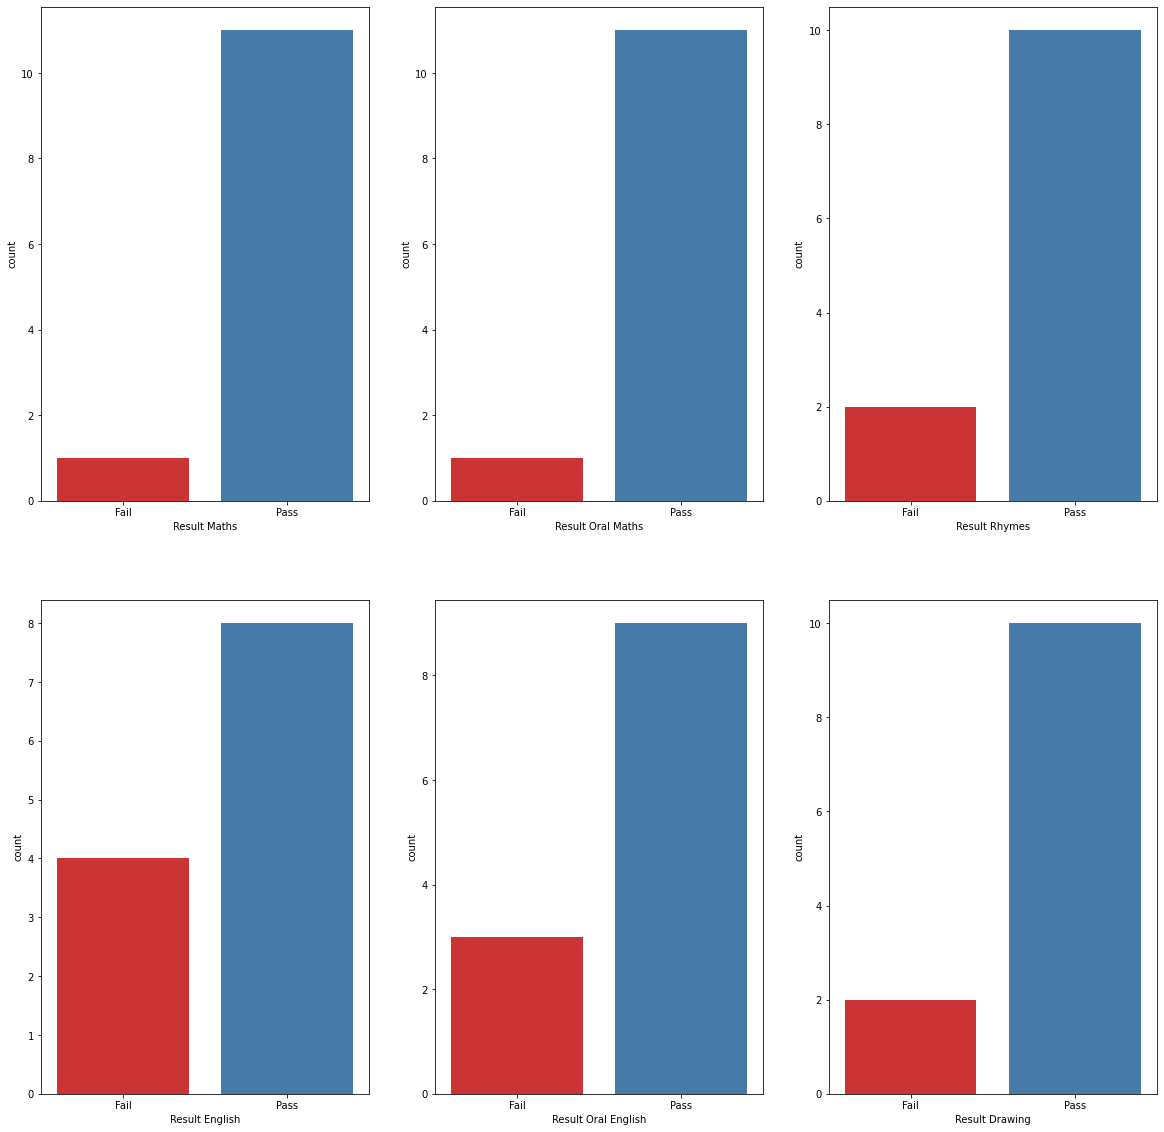

In [17]:
# Combine the charts in one figure
fig, axes = plt.subplots(2, 3, figsize=(20, 20));
for i, subject in enumerate(subjects):
    sns.countplot(x='Result ' + subject, data=df_new, palette='Set1', order=['Fail', 'Pass'], ax=axes[i // 3, i % 3]);
plt.show();